In [41]:
import numpy as np
import pandas as pd
from IPython.display import display
from matplotlib import pyplot as plt
import seaborn as sns


In [42]:
temperatureDF = pd.read_csv("D:\Documents\Datasets\TemperaturasGlobais\TemperaturasGlobais.csv")

In [43]:
display(temperatureDF)

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E
1,1743-12-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
2,1744-01-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
3,1744-02-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
4,1744-03-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
...,...,...,...,...,...,...,...
8599207,2013-05-01,11.464,0.236,Zwolle,Netherlands,52.24N,5.26E
8599208,2013-06-01,15.043,0.261,Zwolle,Netherlands,52.24N,5.26E
8599209,2013-07-01,18.775,0.193,Zwolle,Netherlands,52.24N,5.26E
8599210,2013-08-01,18.025,0.298,Zwolle,Netherlands,52.24N,5.26E


In [44]:
temperatureDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8599212 entries, 0 to 8599211
Data columns (total 7 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   dt                             object 
 1   AverageTemperature             float64
 2   AverageTemperatureUncertainty  float64
 3   City                           object 
 4   Country                        object 
 5   Latitude                       object 
 6   Longitude                      object 
dtypes: float64(2), object(5)
memory usage: 459.2+ MB


In [45]:
temperatureDF = temperatureDF.rename(columns = {"dt": "Date"})
temperatureDF["Date"] = pd.to_datetime(temperatureDF["Date"])

In [46]:
temperatureDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8599212 entries, 0 to 8599211
Data columns (total 7 columns):
 #   Column                         Dtype         
---  ------                         -----         
 0   Date                           datetime64[ns]
 1   AverageTemperature             float64       
 2   AverageTemperatureUncertainty  float64       
 3   City                           object        
 4   Country                        object        
 5   Latitude                       object        
 6   Longitude                      object        
dtypes: datetime64[ns](1), float64(2), object(4)
memory usage: 459.2+ MB


In [47]:
temperatureDF.isna().sum()

Date                                  0
AverageTemperature               364130
AverageTemperatureUncertainty    364130
City                                  0
Country                               0
Latitude                              0
Longitude                             0
dtype: int64

In [48]:
temperatureDF["Year"] = temperatureDF["Date"].dt.year
temperatureDF["Year"] = temperatureDF["Year"].astype("int64")
temperatureDF["Month"] = temperatureDF["Date"].dt.month
temperatureDF["Month"] = temperatureDF["Month"].astype("int64")

In [49]:
brazilDF = temperatureDF.drop(temperatureDF[~temperatureDF.Country.isin(["Brazil"])].index)
display(brazilDF)

,Date,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude,Year,Month
152741,1832-01-01,25.953,1.570,Alagoinhas,Brazil,12.05S,37.81W,1832,1
152742,1832-02-01,25.933,2.372,Alagoinhas,Brazil,12.05S,37.81W,1832,2
152743,1832-03-01,25.968,1.585,Alagoinhas,Brazil,12.05S,37.81W,1832,3
152744,1832-04-01,25.100,2.175,Alagoinhas,Brazil,12.05S,37.81W,1832,4
152745,1832-05-01,24.213,1.809,Alagoinhas,Brazil,12.05S,37.81W,1832,5
...,...,...,...,...,...,...,...,...,...
8109068,2013-05-01,18.377,0.527,Volta Redonda,Brazil,21.70S,44.13W,2013,5
8109069,2013-06-01,18.072,0.398,Volta Redonda,Brazil,21.70S,44.13W,2013,6
8109070,2013-07-01,17.539,0.646,Volta Redonda,Brazil,21.70S,44.13W,2013,7
8109071,2013-08-01,18.595,0.614,Volta Redonda,Brazil,21.70S,44.13W,2013,8


In [50]:
brazilDF.isna().sum()

Date                                 0
AverageTemperature               23935
AverageTemperatureUncertainty    23935
City                                 0
Country                              0
Latitude                             0
Longitude                            0
Year                                 0
Month                                0
dtype: int64

In [51]:
brazilDF.fillna(method = "ffill", inplace = True)

In [52]:
display(brazilDF)

,Date,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude,Year,Month
152741,1832-01-01,25.953,1.570,Alagoinhas,Brazil,12.05S,37.81W,1832,1
152742,1832-02-01,25.933,2.372,Alagoinhas,Brazil,12.05S,37.81W,1832,2
152743,1832-03-01,25.968,1.585,Alagoinhas,Brazil,12.05S,37.81W,1832,3
152744,1832-04-01,25.100,2.175,Alagoinhas,Brazil,12.05S,37.81W,1832,4
152745,1832-05-01,24.213,1.809,Alagoinhas,Brazil,12.05S,37.81W,1832,5
...,...,...,...,...,...,...,...,...,...
8109068,2013-05-01,18.377,0.527,Volta Redonda,Brazil,21.70S,44.13W,2013,5
8109069,2013-06-01,18.072,0.398,Volta Redonda,Brazil,21.70S,44.13W,2013,6
8109070,2013-07-01,17.539,0.646,Volta Redonda,Brazil,21.70S,44.13W,2013,7
8109071,2013-08-01,18.595,0.614,Volta Redonda,Brazil,21.70S,44.13W,2013,8


In [53]:
print(brazilDF["City"].unique())

['Alagoinhas' 'Americana' 'Anápolis' 'Ananindeua' 'Angra Dos Reis'
 'Apucarana' 'Araçatuba' 'Aracaju' 'Araguaína' 'Arapiraca' 'Araraquara'
 'Araras' 'Araruama' 'Araucária' 'Atibaia' 'Barbacena' 'Barra Mansa'
 'Barreiras' 'Barretos' 'Barueri' 'Bauru' 'Belém' 'Belford Roxo'
 'Belo Horizonte' 'Betim' 'Birigui' 'Blumenau' 'Boa Vista' 'Botucatu'
 'Bragança Paulista' 'Brasília' 'Cabo Frio' 'Cachoeirinha'
 'Cachoeiro De Itapemirim' 'Camaçari' 'Camaragibe' 'Campina Grande'
 'Campinas' 'Campo Grande' 'Campos' 'Canoas' 'Carapicuíba' 'Cariacica'
 'Caruaru' 'Cascavel' 'Castanhal' 'Catanduva' 'Caucaia' 'Caxias'
 'Caxias Do Sul' 'Chapecó' 'Colatina' 'Colombo' 'Conselheiro Lafaiete'
 'Contagem' 'Coronel Fabriciano' 'Cotia' 'Criciúma' 'Cubatão' 'Cuiabá'
 'Curitiba' 'Diadema' 'Divinópolis' 'Dourados' 'Duque De Caxias' 'Embu'
 'Esmeraldas' 'Feira De Santana' 'Ferraz De Vasconcelos' 'Florianópolis'
 'Fortaleza' 'Foz Do Iguaçu' 'Franca' 'Francisco Morato' 'Franco Da Rocha'
 'Garanhuns' 'Goiânia' 'Governad

In [ ]:
capitais = ["Rio Branco", "Maceió", "Macapá", "Manaus", "Salvador", "Fortaleza", "Brasília", "Vitória", "Goiânia", "São Luís", "Cuiabá", "Campo Grande", "Belo Horizonte", "Belém", 
            "João Pessoa", "Curitiba", "Recife", "Teresina", "Rio de Janeiro", "Natal", "Porto Alegre", "Porto Velho", "Boa Vista", "Florianópolis", "São Paulo", "Aracaju", "Palmas"]

In [54]:
beloHorizonteDF = brazilDF.drop(brazilDF[~brazilDF.City.isin(["Belo Horizonte"])].index)
display(beloHorizonteDF)

,Date,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude,Year,Month
813539,1832-01-01,22.516,1.556,Belo Horizonte,Brazil,20.09S,44.36W,1832,1
813540,1832-02-01,23.198,3.471,Belo Horizonte,Brazil,20.09S,44.36W,1832,2
813541,1832-03-01,22.188,1.667,Belo Horizonte,Brazil,20.09S,44.36W,1832,3
813542,1832-04-01,20.045,2.743,Belo Horizonte,Brazil,20.09S,44.36W,1832,4
813543,1832-05-01,18.500,2.253,Belo Horizonte,Brazil,20.09S,44.36W,1832,5
...,...,...,...,...,...,...,...,...,...
815715,2013-05-01,20.316,0.412,Belo Horizonte,Brazil,20.09S,44.36W,2013,5
815716,2013-06-01,19.970,0.554,Belo Horizonte,Brazil,20.09S,44.36W,2013,6
815717,2013-07-01,19.498,0.498,Belo Horizonte,Brazil,20.09S,44.36W,2013,7
815718,2013-08-01,20.582,0.442,Belo Horizonte,Brazil,20.09S,44.36W,2013,8


In [55]:
beloHorizonteDF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2181 entries, 813539 to 815719
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Date                           2181 non-null   datetime64[ns]
 1   AverageTemperature             2181 non-null   float64       
 2   AverageTemperatureUncertainty  2181 non-null   float64       
 3   City                           2181 non-null   object        
 4   Country                        2181 non-null   object        
 5   Latitude                       2181 non-null   object        
 6   Longitude                      2181 non-null   object        
 7   Year                           2181 non-null   int64         
 8   Month                          2181 non-null   int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 170.4+ KB


In [56]:
years = [1832, 1882, 1932, 1982, 2012]
plotBH = beloHorizonteDF.drop(beloHorizonteDF[~beloHorizonteDF.Year.isin(years)].index)
display(plotBH)

,Date,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude,Year,Month
813539,1832-01-01,22.516,1.556,Belo Horizonte,Brazil,20.09S,44.36W,1832,1
813540,1832-02-01,23.198,3.471,Belo Horizonte,Brazil,20.09S,44.36W,1832,2
813541,1832-03-01,22.188,1.667,Belo Horizonte,Brazil,20.09S,44.36W,1832,3
813542,1832-04-01,20.045,2.743,Belo Horizonte,Brazil,20.09S,44.36W,1832,4
813543,1832-05-01,18.500,2.253,Belo Horizonte,Brazil,20.09S,44.36W,1832,5
813544,1832-06-01,18.043,2.059,Belo Horizonte,Brazil,20.09S,44.36W,1832,6
813545,1832-07-01,17.749,2.747,Belo Horizonte,Brazil,20.09S,44.36W,1832,7
813546,1832-08-01,18.510,2.570,Belo Horizonte,Brazil,20.09S,44.36W,1832,8
813547,1832-09-01,19.754,2.998,Belo Horizonte,Brazil,20.09S,44.36W,1832,9
813548,1832-10-01,20.629,2.249,Belo Horizonte,Brazil,20.09S,44.36W,1832,10


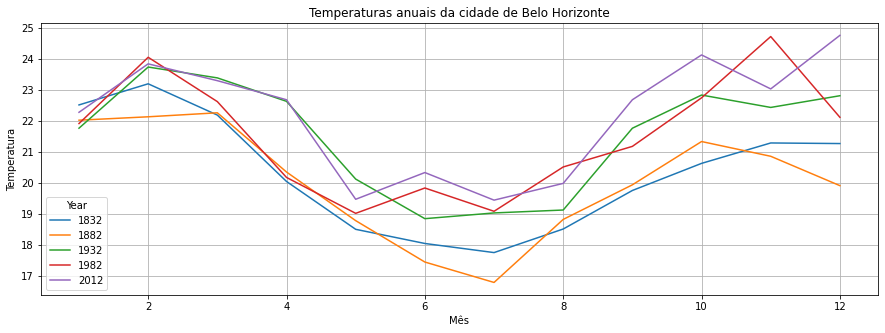

In [65]:
fig, axes = plt.subplots(figsize = (15, 5))
sns.lineplot(x = "Month", y = "AverageTemperature", hue = "Year", data = plotBH, palette = "tab10")
axes.set(xlabel = "Mês", ylabel = "Temperatura", title = f"Temperaturas anuais da cidade de Belo Horizonte")
# plt.yticks(np.arange(0, max(plotBH["AverageTemperature"])+5, 5.0))
plt.grid()
plt.show()